In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [8]:
dataDir='..'
# dataType='val2014'
dataType='train2014'
annFile='{}/annotations/captions_{}.json'.format(dataDir,dataType)

In [9]:
# initialize COCO api for instance annotations
print annFile
coco=COCO(annFile)
print len(coco.dataset)

../annotations/captions_train2014.json
loading annotations into memory...
Done (t=1.65s)
creating index...
index created!
4
4


In [10]:
dataset = coco.dataset
print dataset.keys()
print len(dataset['annotations'])
print 
print dataset['images'][0].keys()
print len(dataset['images'])

[u'info', u'images', u'licenses', u'annotations']
414113

[u'license', u'file_name', u'coco_url', u'height', u'width', u'date_captured', u'flickr_url', u'id']
82783


In [ ]:
# display COCO categories and supercategories
# cats = coco.loadCats(coco.getCatIds())
# print cats
# nms=[cat['name'] for cat in cats]
# print('COCO categories: \n{}\n'.format(' '.join(nms)))

# nms = set([cat['supercategory'] for cat in cats])
# print('COCO supercategories: \n{}'.format(' '.join(nms)))

In [92]:
A = set([1,2,3]);
A = A.union(set([1,4]))
print A
print 'AB'.lower()
import sys
print sys.maxint

set([1, 2, 3, 4])
ab
9223372036854775807


In [15]:
# get all images containing given categories, select one at random
# catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
# imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds()
# rand_idx = imgIds[np.random.randint(0,len(imgIds))]
# print rand_idx
import re;
import sys;
# print coco.loadImgs(imgIds[2])
img = coco.loadImgs(imgIds[1])[0]
h_set = set();
w_set = set();
tokenset = set();
longest_sen = 0;
shortest_sen = sys.maxint;
reg = re.compile('[^a-zA-Z]');
cnt = 0;
print 'N=',len(imgIds);
for i in range(len(imgIds)):
    imgId = imgIds[i];
    img_ = coco.loadImgs(imgId)[0];
    annIds = coco.getAnnIds(imgIds=img_['id']);
    anns = coco.loadAnns(annIds)
    for ann in anns:
        sen = ann['caption'].split(" ");
        longest_sen = max(longest_sen, len(sen));
        shortest_sen = min(shortest_sen, len(sen));
        cnt += len(sen);
        
        tokenset = tokenset.union(map(lambda x: reg.sub('',x.lower()), sen));
#     h_set.add(img_['height']);
#     w_set.add(img_['width']);

# print 'min',min(h_set), 'max',max(h_set);
# print 'min',min(w_set), 'max',max(w_set);
print 'longest_sen', longest_sen;
print 'shortest_sen', shortest_sen;
print 'cnt', cnt/(5*len(imgIds));
print 'tokens', len(tokenset)

N= 82783
longest_sen 179
shortest_sen 8
cnt 10
tokens 24413


[u'license', u'file_name', u'coco_url', u'height', u'width', u'date_captured', u'flickr_url', u'id']
http://mscoco.org/images/393225
428
640


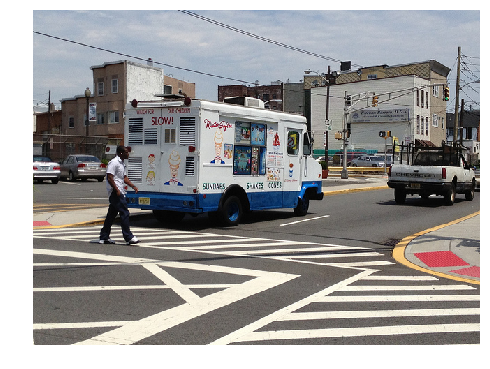

In [72]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
print img.keys()
print img['coco_url']
print img['height'];
print img['width']
name = img2['file_name']
# I = io.imread(img['coco_url'])
I = io.imread('../val2014/'+name);
plt.axis('off')
plt.imshow(I)
plt.show()

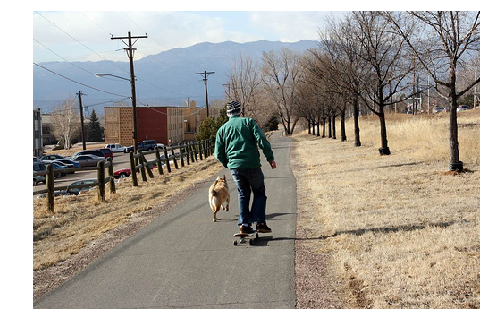

In [42]:
name2 = img2['file_name']
I = io.imread('../val2014/'+name2);
plt.axis('off')
plt.imshow(I)
plt.show()

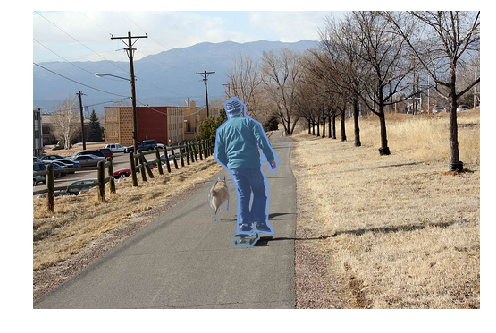

In [7]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [8]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


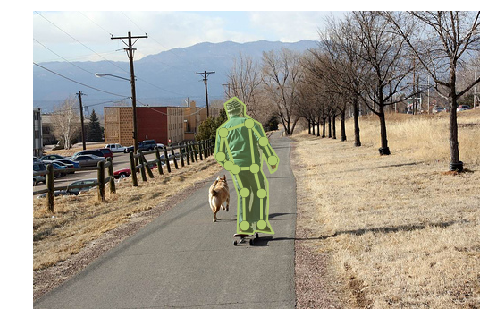

In [9]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [10]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.13s)
creating index...
index created!


A man is skate boarding down a path and a dog is running by his side.
A man on a skateboard with a dog outside. 
A person riding a skate board with a dog following beside.
This man is riding a skateboard behind a dog.
A man walking his dog on a quiet country road.


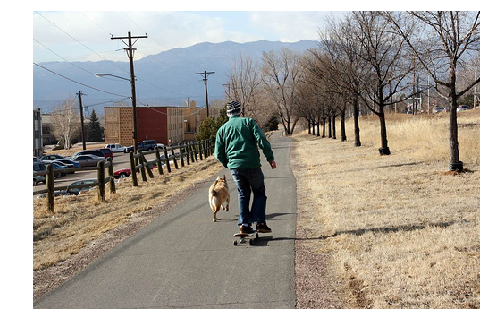

In [11]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()